# 3.6 Tutorial: Histogram Construction

In [109]:
import os, sys

download data from:

https://www.cdc.gov/brfss/annual_data/2000/files/cdbrfss2000asc.zip

https://www.cdc.gov/brfss/annual_data/2001/files/cdbrfss2001asc.zip

https://www.cdc.gov/brfss/annual_data/2002/files/cdbrfs2002asc.ZIP

https://www.cdc.gov/brfss/annual_data/2003/files/CDBRFS03ASC.ZIP

https://www.cdc.gov/brfss/annual_data/2011/files/LLCP2011ASC.ZIP

https://www.cdc.gov/brfss/annual_data/2012/files/LLCP2012ASC.ZIP

https://www.cdc.gov/brfss/annual_data/2013/files/LLCP2013ASC.ZIP

https://www.cdc.gov/brfss/annual_data/2014/files/LLCP2014ASC.ZIP

```python
from Algorithms.ModuleDir import functions
fieldDict = functions.fieldDictBuild()
```

In [110]:
from Algorithms.ModuleDir.functions import fieldDictBuild
fieldDict = fieldDictBuild()

In [111]:
for year in fieldDict:
    print(year, fieldDict[year])

0 {'bmi': (862, 864), 'weight': (832, 841)}
1 {'bmi': (725, 730), 'weight': (686, 695)}
2 {'bmi': (933, 936), 'weight': (822, 831)}
3 {'bmi': (854, 857), 'weight': (745, 754)}
11 {'bmi': (1533, 1536), 'weight': (1475, 1484)}
12 {'bmi': (1644, 1647), 'weight': (1449, 1458)}
13 {'bmi': (2192, 2195), 'weight': (1953, 1962)}
14 {'bmi': (2247, 2250), 'weight': (2007, 2016)}


```python
parentDir = r'/Algorithms/'
if parentDir not in set(sys.path):
    sys.path.append(parentDir)
    print(sys.path)
from Algorithms.ModuleDir import functions
dir(functions)
from importlib import reload
reload(functions)
fieldDict = functions.fieldDictBuild()
```

In [112]:
from Algorithms.ModuleDir.functions import convertBMI

In [113]:
intervals = [(10+i, 10+(i+1)) for i in range(65)]

In [114]:
years = [2000, 2001, 2002, 2003, 2011, 2012, 2013, 2014]
histDict = {}
for year in years:
    histDict[year] = dict.fromkeys(intervals,0)

file name format:
00.ASC, 01.ASC, ...., 13.ASC, 14.ASC

In [115]:
path = r'Algorithms/Data/' # Set the path to match your data directory.
fileList = os.listdir(path) # Creates a list of files in path

outCounter = 0
n = 0
m = 0

for filename in fileList:
    filename.split('.')[0][2:]
    try:
        shortYear = int(filename[6:8])
    except:
        shortYear = int(filename.split('.')[0])
    year = 2000 + shortYear
    print(year)
    fields = fieldDict[shortYear]
    sWt, eWt = fields['weight']
    sBMI, eBMI = fields['bmi']
    
    histogram = histDict[year]
    
    file = path+filename
    print(file,sWt, eWt,sBMI, eBMI)
    
    with open(file, 'r', encoding='latin-1') as f:

        for record in f:
            #print(len(record))
            #weight = float(record[sWt-1:eWt])

            try:
                weight_str = record[sWt-1:eWt].strip()
                if weight_str != '':
                    weight = float(weight_str)
                else:
                    weight = 0
            except ValueError:
                weight = 0

            bmiString = record[sBMI-1:eBMI]
            
            try:
                bmi = convertBMI(bmiString, shortYear)
            except ValueError:
                bmi = 0
                
            if bmiString != ' ':
                
                for interval in histogram:
                    if interval[0] < bmi <= interval[1]:
                        histogram[interval] += weight
                        break
                    
                n += 1
                outCounter += int(bmi < 10 or bmi > 75)
print(n,outCounter)

2000
Algorithms/Data/00.ASC 832 841 862 864
2001
Algorithms/Data/01.ASC 686 695 725 730
2002
Algorithms/Data/02.ASC 822 831 933 936
2003
Algorithms/Data/03.ASC 745 754 854 857
2011
Algorithms/Data/11.ASC 1475 1484 1533 1536
2012
Algorithms/Data/12.ASC 1449 1458 1644 1647
2013
Algorithms/Data/13.ASC 1953 1962 2192 2195
2014
Algorithms/Data/14.ASC 2007 2016 2247 2250
2848199 154007


In [ ]:
decadeWts = [0]*2
decades = [0, 1]
decadeDict = {}
for decade in decades:
    decadeDict[decade] = dict.fromkeys(intervals, 0)

0
1


In [124]:
for year in years:
    decade = int(year/2005)
    histogram = histDict[year]
    for interval in histogram:
        weightSum = histogram[interval]
        decadeDict[decade][interval] += weightSum
        decadeWts[decade] += weightSum

In [125]:
for decade in decadeDict:
    histogram = decadeDict[decade]
    for interval in histogram:
        histogram[interval] = histogram[interval]/decadeWts[decade]

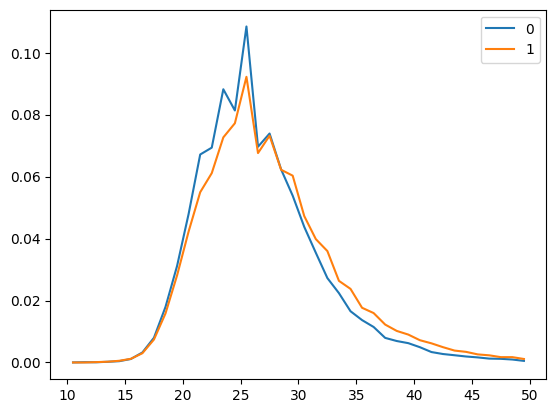

In [126]:
import matplotlib.pyplot as plt
import numpy as np
x = [np.mean(pair) for pair in intervals if pair[0] < 50]
y = [decadeDict[0][pair] for pair in intervals if pair[0] < 50]
plt.plot(x, y)
y = [decadeDict[1][pair] for pair in intervals if pair[0] < 50]
plt.plot(x, y)
plt.legend([str(label) for label in range(2)], loc='upper right')

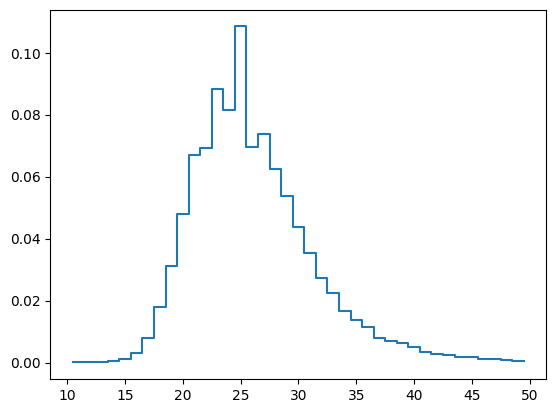

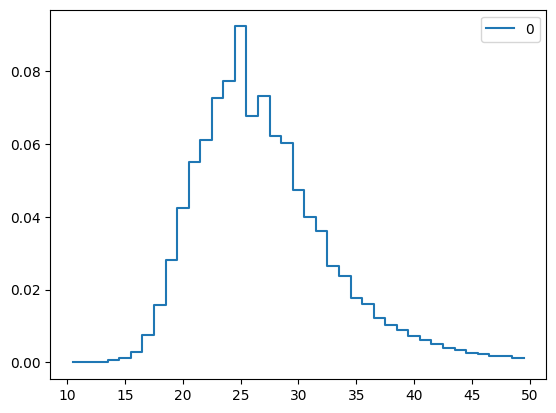

In [127]:
x = [np.mean(pair) for pair in intervals if pair[0] < 50]
y = [decadeDict[0][pair] for pair in intervals if pair[0] < 50]
plt.figure(1)
plt.plot(x, y, drawstyle='steps')
y = [decadeDict[1][pair] for pair in intervals if pair[0] < 50]
plt.figure(2)
plt.plot(x, y, drawstyle='steps')
plt.legend([str(label) for label in range(2)], loc='upper right')

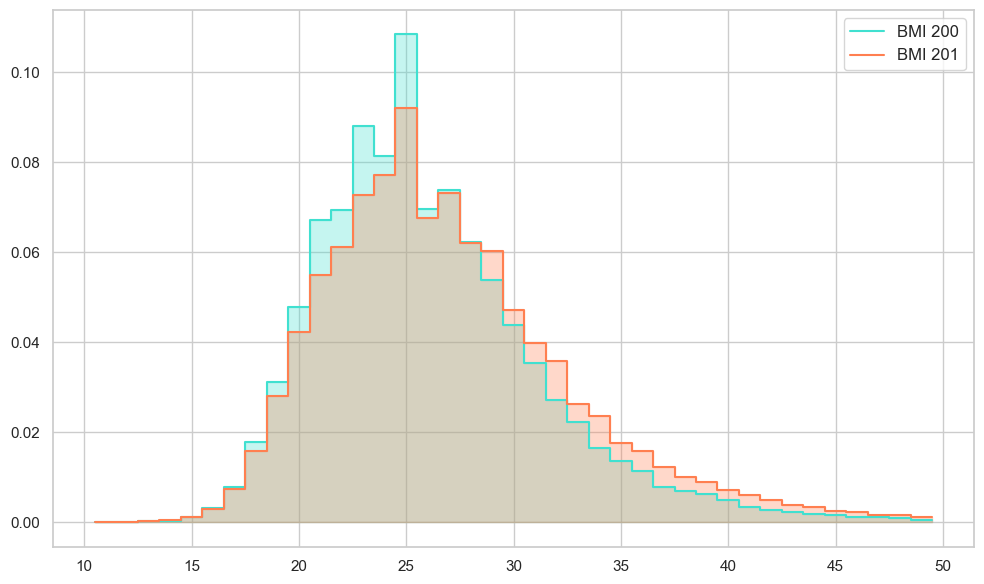

In [132]:
import seaborn as sns

# محاسبه داده‌ها
x = [np.mean(pair) for pair in intervals if pair[0] < 50]
y1 = [decadeDict[0][pair] for pair in intervals if pair[0] < 50]
y2 = [decadeDict[1][pair] for pair in intervals if pair[0] < 50]

# تنظیمات seaborn
sns.set(style="whitegrid")

# رسم نمودار
plt.figure(figsize=(10, 6))
sns.lineplot(x=x, y=y1, label="BMI 200", drawstyle='steps', color="#40E0D0")  # فیروزه‌ای
sns.lineplot(x=x, y=y2, label="BMI 201", drawstyle='steps', color="#FF7F50")  # گلبه‌ای

# رنگ کردن فضای زیر خطوط
plt.fill_between(x, y1, step="pre", alpha=0.3, color="#40E0D0")  # فیروزه‌ای
plt.fill_between(x, y2, step="pre", alpha=0.3, color="#FF7F50")  # گلبه‌ای

# تنظیمات نمایش
plt.legend(loc="upper right", fontsize=12)
plt.tight_layout()

# نمایش نمودار
plt.show()


In [148]:
BMI30_2000 = sum([decadeDict[0][(a,b)] for a, b in decadeDict[0] if a >= 30])
BMI30_2010 = sum([decadeDict[1][(a,b)] for a, b in decadeDict[1] if a >= 30])

In [149]:
print('bmi > 30 (2000): ',BMI30_2000)
print('bmi > 30 (2010): ',BMI30_2010)

print(((BMI30_2010 - BMI30_2000) / BMI30_2000) * 100, '%')

bmi > 30 (2000):  0.21559744892905727
bmi > 30 (2010):  0.27978851412842165
29.77357362910475 %
